In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import re
import requests
pd.options.display.max_rows = 5000 

CSV_list

GSK_2016, AV_2016, BA_2016, RDSB_2016, SPX_2016

In [2]:
def get_close(stock):
    data = pd.read_csv(r'/Users/paxton615/Desktop/Stock_Price_csv/tier_1_stocks/{}.csv'.format(stock)) # read data from csv 注意文件夹路径和文件名
    df = data[['time','close']]                                          # get time and close price
    df.columns = ['date', stock]                                       # change column names
    df.date = [datetime.fromisoformat(i[:10]) for i in df['date']]       # convert dates into datetime
    df = df.loc[(df['date']>='2016-01-01')&(df['date']<'2021-01-01')]    # make sure date start from 2016-01-01
#     print(df.head(),df.tail(), len(df.date))                             # check header and df length
    return (df)

#### 这里发现了一个大bug

合并dataframe时，如果index是乱序，则合并出来的结果也可能是乱序

In [3]:
GSK = get_close('GSK')
GSK = GSK.reset_index(drop=True)
AV = get_close('AV')
AV = AV.reset_index(drop=True)
BA = get_close('BA')
BA = BA.reset_index(drop=True)
RDSB = get_close('RDSB')
RDSB = RDSB.reset_index(drop=True)
SPX = get_close('SPX')
SPX = SPX.reset_index(drop=True)

/Users/paxton615/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [4]:
df = pd.DataFrame({'date':GSK['date'], 'gsk':GSK['GSK'], 'av':AV['AV'], 'ba':BA['BA'], 'rdsb':RDSB['RDSB'], 'spx':SPX['SPX']})
df = df.set_index('date', drop=True)
df.head()

,gsk,av,ba,rdsb,spx
date,,,,,
2016-01-04,1364.5,497.60001,493.5,1538.0,3190
2016-01-05,1386.0,500.00000,494.0,1535.0,3225
2016-01-06,1380.5,495.29999,512.5,1504.0,3191
2016-01-07,1344.5,481.89999,505.5,1462.0,3175
2016-01-08,1371.5,476.89999,519.5,1375.5,3129


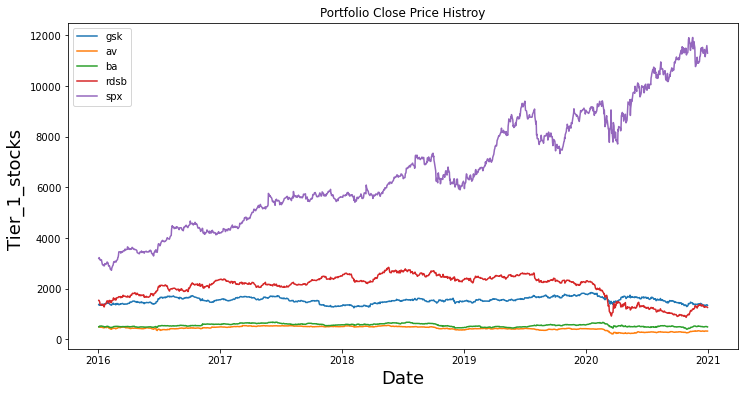

In [7]:
# visually show portfolio
title = 'Portfolio Close Price Histroy'

# get the stocks
my_stocks = df

# create
plt.figure(figsize=(12,6))
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label= c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tier_1_stocks ', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [10]:
# show the daily simple return
returns = df.pct_change() #  pct_change = (day_price - previous_day_price) / previous_day_price
returns.head()

,gsk,av,ba,rdsb,spx
date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.015757,0.004823,0.001013,-0.001951,0.010972
2016-01-06,-0.003968,-0.009400,0.037449,-0.020195,-0.010543
2016-01-07,-0.026078,-0.027054,-0.013659,-0.027926,-0.005014
2016-01-08,0.020082,-0.010376,0.027695,-0.059166,-0.014488


In [9]:
# check the covariance among stocks
returns.cov()

,gsk,av,ba,rdsb,spx
gsk,0.000167,0.000062,0.000073,0.000107,0.000065
av,0.000062,0.000357,0.000139,0.000213,0.000104
ba,0.000073,0.000139,0.000239,0.000137,0.000092
rdsb,0.000107,0.000213,0.000137,0.000441,0.000108
spx,0.000065,0.000104,0.000092,0.000108,0.000223


In [11]:
# create the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,gsk,av,ba,rdsb,spx
gsk,0.042089,0.015738,0.018329,0.026892,0.016345
av,0.015738,0.089965,0.035064,0.053564,0.026280
ba,0.018329,0.035064,0.060153,0.034410,0.023200
rdsb,0.026892,0.053564,0.034410,0.111052,0.027276
spx,0.016345,0.026280,0.023200,0.027276,0.056096
